# Load Data

This file was included with the dataset and permit to load the dataset and display one of each class.

It has been modified in order to remove skimage dependency.

In [1]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

### Dataset path

In [2]:
path = "data/images/"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list, size=(300,180), flattened=False):
    '''
    Function to create a dataset. It will load all the images into a np.array 
    
    Parameters: 
    
    - file_list: List of all the images you want to include in the dataset. 
    - Size : Size of the images, by default is 180x300 which is the original size. 
    - flattened: By default is False. Creates a dataset, but each image get converted into a big vector. 
    
    Output: 
    
    data: it outputs the dataset as a big np array 
    labels : It outputs the binary label. 1 for pollen 0 for non pollen. 
    
    '''
    
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant') # adjust grain
        if flattened:
            image = image.flatten()

        data.append(image)

        
    # On Windows, replace path \ character by / :
    # TODO: use os.path.join() or pathlib library instead
    file_list = [f.replace("\\", "/") if "\\" in f else f for f in file_list]
    
    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]
    

    return np.array(data), np.array(labels)

In [4]:
# Randomise the list of picture now because they are classified by name
np.random.shuffle(imlist)

# Load the dataset (may take a few seconds)
X,y = dataset(imlist, (25, 15))

datasetSize = X.shape[0]

### Dataset dimensions

In [5]:
# X has the following structure: X[imageid, y, x, channel]
print('X: ', X.shape)  # data
print('y: ', y.shape)  # target

X:  (714, 25, 15, 3)
y:  (714,)


In [6]:
print('Class 0: ', sum(y==0))
print('Class 1: ', sum(y==1))
print('Total  : ', len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0

### Classes examples

In [7]:
%matplotlib inline

Text(0.5, 1.0, 'img 400 - class 0')

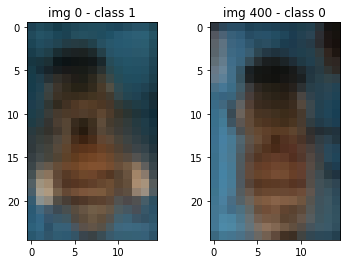

In [8]:
### /!\ ###########################################################
# NO LONGER RELEVANT since the dataset has been randomised upstream
###################################################################


fig, axes = plt.subplots(1,2)
k = 0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k = 400 # datasetSize-1 -> last bee (X[datasetSize-1]) don't seems holding pollen.. ?
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

### Divide the dataset into training and validation set(s) (TODO: cross-validation ?)

In [9]:
def loadSubSets(X, y, ratio_train, ratio_valid):
    '''
    Function to create a dataset. It will load all the images into a np.array
    
    Parameters:
    
    - X : Vector of all the images of the dataset.
    - y : Corresponding binary label vector. 1 for pollen 0 for non pollen.
    - ratio_train : Desired percentage of dataset dedicated to train phase.
    - ratio_valid : Desired percentage of dataset dedicated to valid phase.
    
    Output:

    X_train : training phase images subset
    y_train : training phase label subset.
    X_valid : validation phase images subset
    y_valid : validation phase label subset.
    X_test  : testing phase images subset
    y_test  : testing phase label subset.
    
    '''
    ratio_test = 1 - ratio_train - ratio_valid
    assert(ratio_test > 0)
    
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain: Ntrain+Nvalid].copy()
    y_valid = y[Ntrain: Ntrain+Nvalid].copy()
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [10]:
# Example usage of previous function
ratio_train = 0.6
ratio_valid = 0.3

X_train, y_train, X_valid, y_valid, X_test, y_test = loadSubSets(X, y, ratio_train, ratio_valid)

### Large grain

In [11]:
# X,y = dataset(imlist, (300, 180)) # default resolution
# X,y = dataset(imlist, (150, 90))
# X,y = dataset(imlist, (100, 60))
# X,y = dataset(imlist, (25, 15))   # preferred resolution

### TODO: Apply a more or less naive Bayesian on the training and validation data

In [12]:
# "sklearn.NaiveBayesian".fit(...)

# "sklearn.NaiveBayesian"predict(...)

### TODO: Display test/validation scores graphs according to the ratio or to the grain hyperparameters

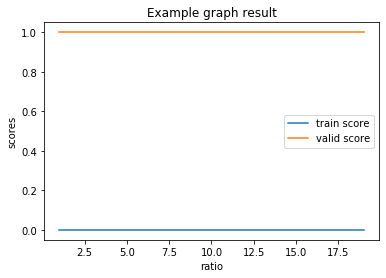

In [13]:
plt.figure()
plt.plot(np.arange(1, 20, 2), np.zeros(10), label= "train score")
plt.plot(np.arange(1, 20, 2), np.ones(10), label= "valid score")
plt.xlabel("ratio")
plt.ylabel("scores")
plt.title("Example graph result")
plt.legend()

### BonusTODO: Implement PCA _(after grain adaptation but before bayesian)_

In [14]:
# preProc = sklearn.decomposition.PCA(n_components=nc, copy=True)
# preProc.fit(X_train)
# ...

# Change the number of components and estimate the best one with a small green dot as in TP3 part 2 :
# plt.plot(..., ...[bestIndex], marker='X', color='green')